# Introducción al aprendizaje automatizado - TP 4
## Autora: Aldana Zarate
### Imports y funciones auxiliares


In [1]:
import tp0
import tp1ej4
import tp3ej1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from copy import deepcopy

import random
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Número de vecinos a ir usando
ns = list(range(2,30)) # no arrancamos en uno para que no de increíblemente bien porque justo quedó el vecino al lado

def entrenar_knn(rango_vecinos, X_train, y_train, X_val, y_val, X_test, y_test, weights = 'uniform'):
    # Recolección de errores segun cantidad de vecinos
    train_errors = []
    val_errors = []
    test_errors = []
    knn_model = None

    best_model = None
    best_train_error = None
    best_val_error = None
    best_test_error = None

    for n in rango_vecinos:
        knn_model = KNeighborsClassifier(n_neighbors=n, weights = weights)
        knn_model.fit(X_train, y_train)
        
        # Medimos los errores
        train_error_i = 1 - accuracy_score(knn_model.predict(X_train), y_train)
        val_error_i = 1 - accuracy_score(knn_model.predict(X_val), y_val)
        test_error_i = 1 - accuracy_score(knn_model.predict(X_test), y_test)

        # Chequeo si los resultados con esta cantidad de vecinos es mejor que la actual
        if best_val_error is None or val_error_i < best_val_error:
            k_opt = n
            best_val_error = val_error_i
            best_train_error = train_error_i
            best_test_error = test_error_i
            best_model = deepcopy(knn_model)

        # Guardo los errores registrados en esta evaluacion
        train_errors.append(train_error_i)
        val_errors.append(val_error_i)
        test_errors.append(test_error_i)

    
    return best_model, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt

## Funciones para graficar

In [3]:
# Grafico en base a la cantidad de veces que entreno la red (epocas) o las diferentes cantidades de neuronas que se usaron
# m = [vecinos a probar]
def graficar_curvas_errores(e_train, e_val, e_test, m):
  plt.plot(m,e_train,label="train",linestyle=":")
  plt.plot(m,e_val,label="validacion",linestyle="-.")
  plt.plot(m,e_test,label="test",linestyle="-")
  plt.legend()
  plt.show()

def graficar_predicciones(x, y, title):
  df = pd.DataFrame(x)
  df['Clase'] = y
  df.plot(x=0, y=1, kind='scatter', c = 'Clase', colormap='viridis', title = title)

## Ejercicio 1

### Espirales sin ruido

#### Nearest Neighbour

In [5]:
# Número de vecinos a ir usando
ns = list(range(2,12)) # no arrancamos en uno para que no de increíblemente bien porque justo quedó el vecino al lado

# Datos para ajustar los modelos
col_names = ['x','y','Clase']
train_data = pd.read_csv('c_0.data', names=col_names)
train_samples = train_data[['x','y']]
train_target = train_data['Clase']
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_target, test_size=0.2, random_state=0)

# Datos para test
test_data = pd.read_csv('c_0.test', names=col_names)
test_samples = test_data[['x','y']]
test_target = test_data['Clase']

# Errores mínimos segun cant. de vecinos
best_train_errors = []
best_val_errors = []
best_test_errors = []

# Predicciones
y_test_preds = None

best_model, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(ns, X_train, y_train, X_val, y_val, test_samples, test_target)
  
y_test_preds = best_model.predict(test_data[['x','y']])

print(f'Mejor error de validación: {best_val_error}, con k: {k_opt}')
print(f'Error de entrenamiento: {best_train_error}')
print(f'Error de test: {best_test_error}')

Mejor error de validación: 0.06999999999999995, con k: 3
Error de entrenamiento: 0.02749999999999997
Error de test: 0.09650000000000003


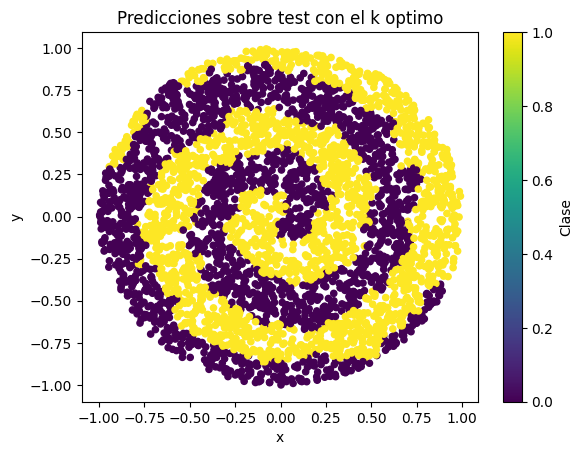

In [6]:
graficar_predicciones(test_data[['x','y']], y_test_preds, "Predicciones sobre test con el k optimo")

#### Curvas de error para nearest neighbours

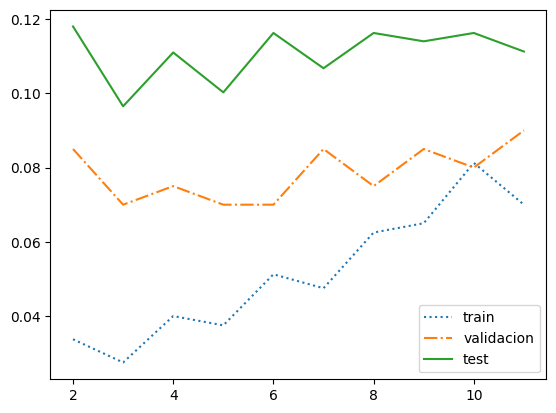

In [8]:
graficar_curvas_errores(train_errors, val_errors, test_errors, ns)

### Predicciones con árboles - sin ruido


<AxesSubplot:title={'center':'Predicciones sobre el conjunto de test'}, xlabel='x', ylabel='y'>

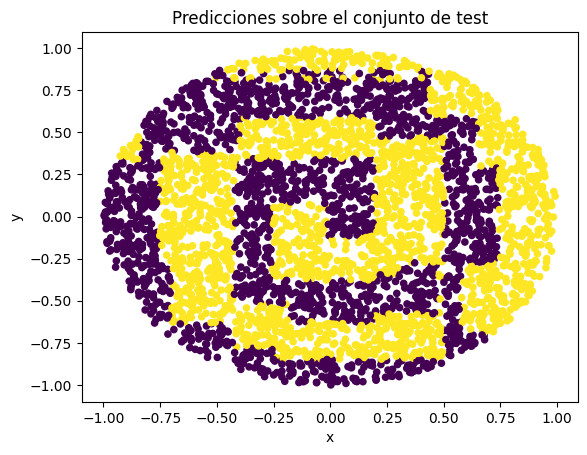

In [9]:
# Datos para ajustar los modelos
col_names = ['x','y','Clase']
train_data = pd.read_csv('c_0.data', names=col_names)
train_samples = train_data[['x','y']]
train_target = train_data['Clase']

# Datos para test
test_data = pd.read_csv('c_0.test', names=col_names)
test_samples = test_data[['x','y']]
test_target = test_data['Clase']

# Entrenamiento con longitud 150
clf_tree = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf_tree.fit(train_samples, train_target)
predicted_y_s_test = clf_tree.predict(test_samples)


spirals_tree = test_samples
spirals_tree['Clase'] = predicted_y_s_test
dataframe_tree = pd.DataFrame(spirals_tree)
dataframe_tree.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title="Predicciones sobre el conjunto de test")

## Espirales con ruido
### Nearest neighbour

In [10]:
# Número de vecinos a ir usando
ns = list(range(2,12)) # no arrancamos en uno para que no de increíblemente bien porque justo quedó el vecino al lado

# Datos para ajustar los modelos
col_names = ['x','y','z','a','Clase']
train_data = pd.read_csv('c_2.data', names=col_names)
train_samples = train_data[['x','y','z','a']]
train_target = train_data['Clase']
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_target, test_size=0.2, random_state=0)

# Datos para test
test_data = pd.read_csv('c_2.test', names=col_names)
test_samples = test_data[['x','y','z','a']]
test_target = test_data['Clase']

# Errores mínimos segun cant. de vecinos
best_train_errors = []
best_val_errors = []
best_test_errors = []

# Predicciones
y_test_preds = None

best_model, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(ns, X_train, y_train, X_val, y_val, test_samples, test_target)
  
y_test_preds = best_model.predict(test_data[['x','y','z','a']])

print(f'Mejor error de validación: {best_val_error}, con k: {k_opt}')
print(f'Error de entrenamiento: {best_train_error}')
print(f'Error de test: {best_test_error}')

Mejor error de validación: 0.41500000000000004, con k: 2
Error de entrenamiento: 0.19874999999999998
Error de test: 0.4295


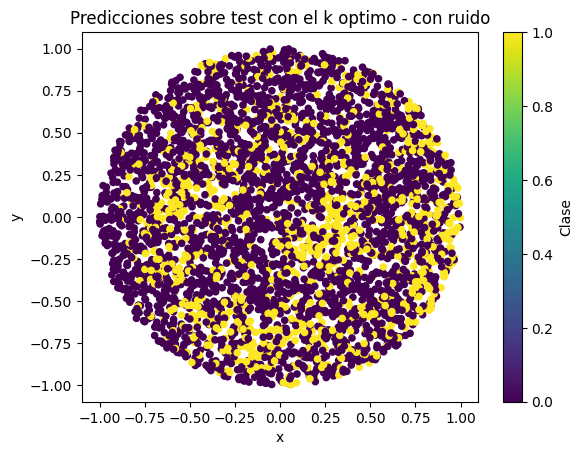

In [11]:
graficar_predicciones(test_data[['x','y']], y_test_preds, "Predicciones sobre test con el k optimo - con ruido")

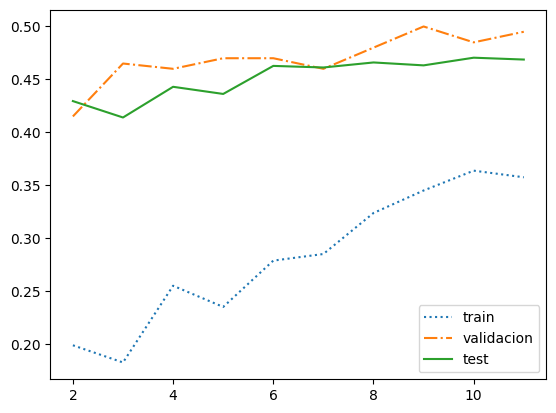

In [12]:
graficar_curvas_errores(train_errors, val_errors, test_errors, ns)

### Predicciones con árboles - con ruido

<AxesSubplot:title={'center':'Predicciones sobre el conjunto de test'}, xlabel='x', ylabel='y'>

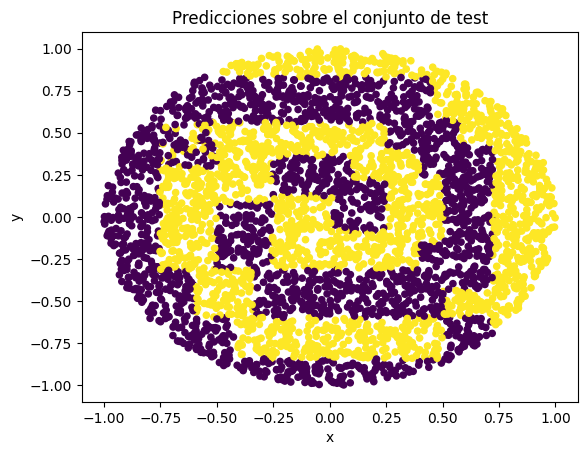

In [15]:
# Datos para ajustar los modelos
col_names = ['x','y','z','a','Clase']
train_data = pd.read_csv('c_2.data', names=col_names)
train_samples = train_data[['x','y','z','a']]
train_target = train_data['Clase']

# Datos para test
test_data = pd.read_csv('c_2.test', names=col_names)
test_samples = test_data[['x','y','z','a']]
test_target = test_data['Clase']

# Entrenamiento con longitud 150
clf_tree = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf_tree.fit(train_samples, train_target)
predicted_y_s_test = clf_tree.predict(test_samples)


spirals_tree = test_data.loc[: , ['x','y'] ]
spirals_tree['Clase'] = predicted_y_s_test
dataframe_tree = pd.DataFrame(spirals_tree)
dataframe_tree.plot(x=0, y=1, kind='scatter', c='Clase', colormap='viridis',colorbar=False, title="Predicciones sobre el conjunto de test")

## Conclusiones

# Ejercicio 2


In [17]:
def ej2(mink=True):
    # Valores de d
    d_iterable = [2, 4, 8, 16, 32]

    # Datos a guardar pedidos
    train_errors_d = []
    test_errors_d = []

    train_errors_p = []
    test_errors_p = []

    # Guardo la dimension que va teniendo d para poder armar el dataframe a la hora de analizar
    dimensions = []

    for d in d_iterable:
        # Conjuntos de test
        # Diagonal
        d_test = tp0.generate_dataframe_ej_a(d, 10000, 0.78)
        cols = range(0, d)
        X_d_test = d_test[cols]
        y_d_test = d_test['Clase']

        # Paralelo
        p_test = tp0.generate_dataframe_ej_b(d, 10000, 0.78)
        X_p_test = p_test[cols]
        y_p_test = p_test['Clase']
        
        for i in range(0,20):
            # Longitud del conjunto de entrenamiento
            dimensions.append(d)

            # Conjuntos de entrenamiento diagonal
            train_set_d = tp0.generate_dataframe_ej_a(d, 250, 0.78)
            X_d_train = train_set_d[cols]
            y_d_train = train_set_d['Clase']

            X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_d_train, y_d_train, test_size=0.2, random_state=0)

            # Conjuntos de entrenamiento paralelo
            train_set_p = tp0.generate_dataframe_ej_b(d, 250, 0.78)
            X_p_train = train_set_p[cols]
            y_p_train = train_set_p['Clase']

            X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p_train, y_p_train, test_size=0.2, random_state=0)

            if mink:
                # Modelos y entrenamiento diagonal
                clf_d, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(
                    ns, X_train_d, y_train_d, X_val_d, y_val_d, X_d_test, y_d_test)

                # Modelos y entrenamiento paralelo
                clf_p, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(
                    ns, X_train_p, y_train_p, X_val_p, y_val_p, X_p_test, y_p_test)
            else:
                clf_d = KNeighborsClassifier(n_neighbors=1)
                clf_p = KNeighborsClassifier(n_neighbors=1)
                clf_d.fit(X_train_d, y_train_d)
                clf_p.fit(X_train_p, y_train_p)

            # Probamos sobre los conjuntos de testeo
            predicted_d = clf_d.predict(d_test[cols])
            predicted_p = clf_p.predict(p_test[cols])

            # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
            # Error = 1 - accuracy
            train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
            test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

            train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
            test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

    # Armo dataframe con los datos colectados anteriormente
    temp_dataframe_d = pd.DataFrame({})
    temp_dataframe_d['D'] = dimensions
    temp_dataframe_d['TrainError'] = train_errors_d
    temp_dataframe_d['TestError'] = test_errors_d

    temp_dataframe_p = pd.DataFrame({})
    temp_dataframe_p['D'] = dimensions
    temp_dataframe_p['TrainError'] = train_errors_p
    temp_dataframe_p['TestError'] = test_errors_p

    # Dataframes finales a usar para la gráfica
    df_errors_d = pd.DataFrame({})
    df_errors_d['Dimension'] = d_iterable
    df_errors_d['TrainError'] = temp_dataframe_d.groupby('D')['TrainError'].mean().to_numpy()
    df_errors_d['TestError'] = temp_dataframe_d.groupby('D')['TestError'].mean().to_numpy()

    df_errors_p = pd.DataFrame({})
    df_errors_p['Dimension'] = d_iterable
    df_errors_p['TrainError'] = temp_dataframe_p.groupby('D')['TrainError'].mean().to_numpy()
    df_errors_p['TestError'] = temp_dataframe_p.groupby('D')['TestError'].mean().to_numpy()

    return df_errors_d, df_errors_p


Text(0, 0.5, 'Error')

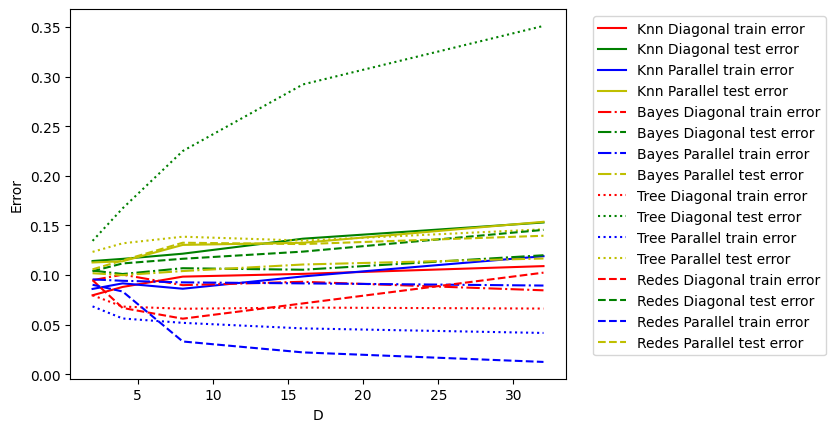

In [18]:
df_errors_d, df_errors_p = ej2()

path = 'datos_errores_redes_d.csv'
datos_errores_redes_d = pd.read_csv(path)
datos_errores_redes_d = datos_errores_redes_d.drop('Unnamed: 0', axis=1)

path = 'datos_errores_redes_p.csv'
datos_errores_redes_p = pd.read_csv(path)
datos_errores_redes_p = datos_errores_redes_p.drop('Unnamed: 0', axis=1)

tree_df_errors_d, tree_df_errors_p = tp1ej4.obtainTreesData()

bayes_df_errors_d, bayes_df_errors_p = tp3ej1.obtainBayesDimData()

plt.plot(df_errors_d['Dimension'], df_errors_d['TrainError'], 'r')
plt.plot(df_errors_d['Dimension'], df_errors_d['TestError'], 'g')
plt.plot(df_errors_p['Dimension'], df_errors_p['TrainError'], 'b')
plt.plot(df_errors_p['Dimension'], df_errors_p['TestError'], 'y')
plt.plot(bayes_df_errors_d['Dimension'], bayes_df_errors_d['TrainError'], 'r', linestyle="dashdot")
plt.plot(bayes_df_errors_d['Dimension'], bayes_df_errors_d['TestError'], 'g',linestyle="dashdot")
plt.plot(bayes_df_errors_p['Dimension'], bayes_df_errors_p['TrainError'], 'b', linestyle="dashdot")
plt.plot(bayes_df_errors_p['Dimension'], bayes_df_errors_p['TestError'], 'y', linestyle="dashdot")
plt.plot(tree_df_errors_d['Dimension'], tree_df_errors_d['TrainError'], 'r', linestyle="dotted")
plt.plot(tree_df_errors_d['Dimension'], tree_df_errors_d['TestError'], 'g', linestyle="dotted")
plt.plot(tree_df_errors_p['Dimension'], tree_df_errors_p['TrainError'], 'b', linestyle="dotted")
plt.plot(tree_df_errors_p['Dimension'], tree_df_errors_p['TestError'], 'y', linestyle="dotted")
plt.plot(datos_errores_redes_d['Dimension'], datos_errores_redes_d['TrainError'], 'r', linestyle="dashed")
plt.plot(datos_errores_redes_d['Dimension'], datos_errores_redes_d['TestError'], 'g',linestyle="dashed")
plt.plot(datos_errores_redes_p['Dimension'], datos_errores_redes_p['TrainError'], 'b', linestyle="dashed")
plt.plot(datos_errores_redes_p['Dimension'], datos_errores_redes_p['TestError'], 'y', linestyle="dashed")
plt.legend(['Knn Diagonal train error', 'Knn Diagonal test error', 'Knn Parallel train error', 'Knn Parallel test error',
            'Bayes Diagonal train error', 'Bayes Diagonal test error', 'Bayes Parallel train error', 'Bayes Parallel test error',
            'Tree Diagonal train error', 'Tree Diagonal test error', 'Tree Parallel train error', 'Tree Parallel test error',
            'Redes Diagonal train error', 'Redes Diagonal test error', 'Redes Parallel train error', 'Redes Parallel test error'],
            bbox_to_anchor=(1.04,1), ncol=1)
plt.xlabel("D")
plt.ylabel("Error")

En la gráfica de arriba se pueden apreciar los resultados usando knn con un k óptimo. 

comentarios

En la siguiente gráfica analizaremos los resultados usando 1 vecino.

In [19]:
df_errors_d, df_errors_p = ej2(False) # le pasamos el parámetro en False para que use un único vecino

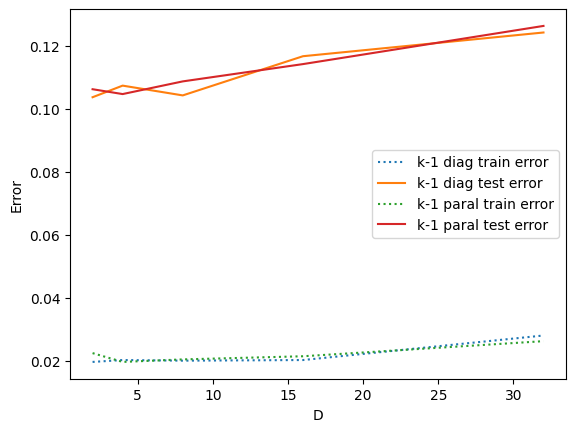

In [11]:
plt.plot(df_errors_d['Dimension'],df_errors_d['TrainError'],label="k-1 diag train error",linestyle=":")
plt.plot(df_errors_d['Dimension'],df_errors_d['TestError'],label="k-1 diag test error",linestyle="-")
plt.plot(df_errors_p['Dimension'],df_errors_p['TrainError'],label="k-1 paral train error",linestyle=":")
plt.plot(df_errors_p['Dimension'],df_errors_p['TestError'],label="k-1 paral test error",linestyle="-")
plt.legend()
plt.xlabel("D")
plt.ylabel("Error")
plt.show()

comentarios

# Ejercicio 3

### Problema de la dimensionalidad: caso k fijo igual a 50 y k óptimo

In [4]:

def ej3(mink=True):
    # Valores de d
    d_iterable = [2, 4, 8, 16, 32]

    # Datos a guardar pedidos
    train_errors_d = []
    test_errors_d = []

    train_errors_p = []
    test_errors_p = []

    # Guardo la dimension que va teniendo d para poder armar el dataframe a la hora de analizar
    dimensions = []

    for d in d_iterable:
        # Conjuntos de test
        # Diagonal
        d_test = tp0.generate_dataframe_ej_a(d, 10000, 0.78)
        cols = range(0, d)
        X_d_test = d_test[cols]
        y_d_test = d_test['Clase']

        # Paralelo
        p_test = tp0.generate_dataframe_ej_b(d, 10000, 0.78)
        X_p_test = p_test[cols]
        y_p_test = p_test['Clase']
        
        for i in range(0,20):
            # Longitud del conjunto de entrenamiento
            dimensions.append(d)

            # Conjuntos de entrenamiento diagonal
            train_set_d = tp0.generate_dataframe_ej_a(d, 250, 0.78)
            X_d_train = train_set_d[cols]
            y_d_train = train_set_d['Clase']

            X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_d_train, y_d_train, test_size=0.2, random_state=0)

            # Conjuntos de entrenamiento paralelo
            train_set_p = tp0.generate_dataframe_ej_b(d, 250, 0.78)
            X_p_train = train_set_p[cols]
            y_p_train = train_set_p['Clase']

            X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p_train, y_p_train, test_size=0.2, random_state=0)

            if mink:
                # Modelos y entrenamiento diagonal
                clf_d, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(
                    ns, X_train_d, y_train_d, X_val_d, y_val_d, X_d_test, y_d_test, weights = 'distance')

                # Modelos y entrenamiento paralelo
                clf_p, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(
                    ns, X_train_p, y_train_p, X_val_p, y_val_p, X_p_test, y_p_test, weights = 'distance')
            else:
                clf_d = KNeighborsClassifier(n_neighbors=50, weights = 'distance')
                clf_p = KNeighborsClassifier(n_neighbors=50, weights = 'distance')
                clf_d.fit(X_train_d, y_train_d)
                clf_p.fit(X_train_p, y_train_p)

            # Probamos sobre los conjuntos de testeo
            predicted_d = clf_d.predict(d_test[cols])
            predicted_p = clf_p.predict(p_test[cols])

            # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
            # Error = 1 - accuracy
            train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
            test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

            train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
            test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

    # Armo dataframe con los datos colectados anteriormente
    temp_dataframe_d = pd.DataFrame({})
    temp_dataframe_d['D'] = dimensions
    temp_dataframe_d['TrainError'] = train_errors_d
    temp_dataframe_d['TestError'] = test_errors_d

    temp_dataframe_p = pd.DataFrame({})
    temp_dataframe_p['D'] = dimensions
    temp_dataframe_p['TrainError'] = train_errors_p
    temp_dataframe_p['TestError'] = test_errors_p

    # Dataframes finales a usar para la gráfica
    df_errors_d = pd.DataFrame({})
    df_errors_d['Dimension'] = d_iterable
    df_errors_d['TrainError'] = temp_dataframe_d.groupby('D')['TrainError'].mean().to_numpy()
    df_errors_d['TestError'] = temp_dataframe_d.groupby('D')['TestError'].mean().to_numpy()

    df_errors_p = pd.DataFrame({})
    df_errors_p['Dimension'] = d_iterable
    df_errors_p['TrainError'] = temp_dataframe_p.groupby('D')['TrainError'].mean().to_numpy()
    df_errors_p['TestError'] = temp_dataframe_p.groupby('D')['TestError'].mean().to_numpy()

    return df_errors_d, df_errors_p

### Caso k óptimo

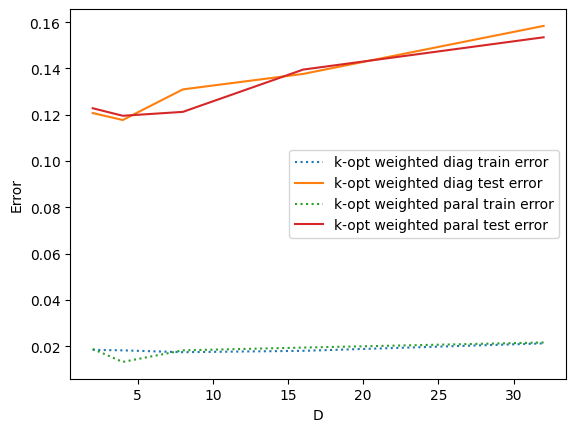

In [13]:
df_errors_d, df_errors_p = ej3()

plt.plot(df_errors_d['Dimension'],df_errors_d['TrainError'],label="k-opt weighted diag train error",linestyle=":")
plt.plot(df_errors_d['Dimension'],df_errors_d['TestError'],label="k-opt weighted diag test error",linestyle="-")
plt.plot(df_errors_p['Dimension'],df_errors_p['TrainError'],label="k-opt weighted paral train error",linestyle=":")
plt.plot(df_errors_p['Dimension'],df_errors_p['TestError'],label="k-opt weighted paral test error",linestyle="-")
plt.legend()
plt.xlabel("D")
plt.ylabel("Error")
plt.show()

comentarios

### Caso k = 50

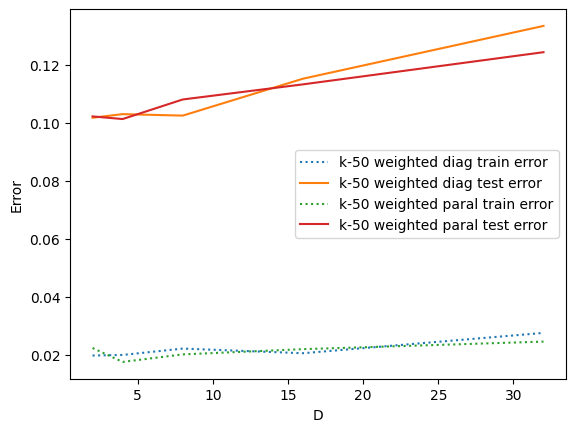

In [14]:
df_errors_d, df_errors_p = ej3(mink=False)

plt.plot(df_errors_d['Dimension'],df_errors_d['TrainError'],label="k-50 weighted diag train error",linestyle=":")
plt.plot(df_errors_d['Dimension'],df_errors_d['TestError'],label="k-50 weighted diag test error",linestyle="-")
plt.plot(df_errors_p['Dimension'],df_errors_p['TrainError'],label="k-50 weighted paral train error",linestyle=":")
plt.plot(df_errors_p['Dimension'],df_errors_p['TestError'],label="k-50 weighted paral test error",linestyle="-")
plt.legend()
plt.xlabel("D")
plt.ylabel("Error")
plt.show()

comentarios

### Caso particular: problema en 32 dimensiones

In [28]:
def ej3_d32(mink=True):

    # Datos a guardar pedidos
    train_errors_d = []
    val_errors_d = []
    test_errors_d = []

    train_errors_p = []
    val_errors_p = []
    test_errors_p = []

    train_errors_d_i = []
    val_errors_d_i = []
    test_errors_d_i = []

    train_errors_p_i = []
    val_errors_p_i = []
    test_errors_p_i = []

    d = 32
    # Conjuntos de test
    # Diagonal
    d_test = tp0.generate_dataframe_ej_a(d, 10000, 0.78)
    cols = range(0, d)
    X_d_test = d_test[cols]
    y_d_test = d_test['Clase']

    # Paralelo
    p_test = tp0.generate_dataframe_ej_b(d, 10000, 0.78)
    X_p_test = p_test[cols]
    y_p_test = p_test['Clase']

    # Lista de vecinos para luego agrupar segun nro de vecino
    vecinos = []
    
    for i in range(0,20):
        # Conjuntos de entrenamiento diagonal
        train_set_d = tp0.generate_dataframe_ej_a(d, 250, 0.78)
        X_d_train = train_set_d[cols]
        y_d_train = train_set_d['Clase']

        X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_d_train, y_d_train, test_size=0.2, random_state=0)

        # Conjuntos de entrenamiento paralelo
        train_set_p = tp0.generate_dataframe_ej_b(d, 250, 0.78)
        X_p_train = train_set_p[cols]
        y_p_train = train_set_p['Clase']

        X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p_train, y_p_train, test_size=0.2, random_state=0)

        if mink:
            #Agrego los vecinos a usar en este entrenamiento
            vecinos = vecinos + ns 
            # Modelos y entrenamiento diagonal
            clf_d, train_errors_d_i, val_errors_d_i, test_errors_d_i, best_train_error_d_i, best_val_error_d_i, best_test_error_d_i, k_opt_d = entrenar_knn(
                ns, X_train_d, y_train_d, X_val_d, y_val_d, X_d_test, y_d_test, weights = 'distance')
            train_errors_d = train_errors_d + train_errors_d_i
            val_errors_d = val_errors_d + val_errors_d_i
            test_errors_d = test_errors_d + test_errors_d_i

            # Modelos y entrenamiento paralelo
            clf_p, train_errors_p_i, val_errors_p_i, test_errors_p_i, best_train_error_p_i, best_val_error_p_i, best_test_error_p_i, k_opt_p = entrenar_knn(
                ns, X_train_p, y_train_p, X_val_p, y_val_p, X_p_test, y_p_test, weights = 'distance')
            train_errors_p = train_errors_p + train_errors_p_i
            val_errors_p = val_errors_p + val_errors_p_i
            test_errors_p = test_errors_p + test_errors_p_i
        else:
            clf_d = KNeighborsClassifier(n_neighbors=50, weights = 'distance')
            clf_p = KNeighborsClassifier(n_neighbors=50, weights = 'distance')
            clf_d.fit(X_train_d, y_train_d)
            clf_p.fit(X_train_p, y_train_p)
            # Probamos sobre los conjuntos de testeo
            predicted_d = clf_d.predict(d_test[cols])
            predicted_p = clf_p.predict(p_test[cols])

            # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
            # Error = 1 - accuracy
            train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
            val_errors_d.append(1 - accuracy_score(y_val_d, clf_d.predict(X_val_d)))
            test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

            train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
            val_errors_p.append(1 - accuracy_score(y_val_p, clf_p.predict(X_val_p)))
            test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

        
    if mink:
        # Armo dataframe con los datos colectados anteriormente
        temp_dataframe_d = pd.DataFrame({})
        temp_dataframe_d['Vecinos'] = vecinos
        temp_dataframe_d['TrainError'] = train_errors_d
        temp_dataframe_d['ValError'] = val_errors_d
        temp_dataframe_d['TestError'] = test_errors_d

        temp_dataframe_p = pd.DataFrame({})
        temp_dataframe_p['Vecinos'] = vecinos
        temp_dataframe_p['TrainError'] = train_errors_p
        temp_dataframe_p['ValError'] = val_errors_p
        temp_dataframe_p['TestError'] = test_errors_p

        # Dataframes finales a usar para la gráfica
        df_errors_d = pd.DataFrame({})
        df_errors_d['Vecinos'] = ns
        df_errors_d['TrainError'] = temp_dataframe_d.groupby('Vecinos')['TrainError'].mean().to_numpy()
        df_errors_d['ValError'] = temp_dataframe_d.groupby('Vecinos')['ValError'].mean().to_numpy()
        df_errors_d['TestError'] = temp_dataframe_d.groupby('Vecinos')['TestError'].mean().to_numpy()

        df_errors_p = pd.DataFrame({})
        df_errors_p['Vecinos'] = ns
        df_errors_p['TrainError'] = temp_dataframe_p.groupby('Vecinos')['TrainError'].mean().to_numpy()
        df_errors_p['ValError'] = temp_dataframe_p.groupby('Vecinos')['ValError'].mean().to_numpy()
        df_errors_p['TestError'] = temp_dataframe_p.groupby('Vecinos')['TestError'].mean().to_numpy()
    
    else:
        # Armo dataframe con los datos colectados anteriormente
        temp_dataframe_d = pd.DataFrame({})
        temp_dataframe_d['Vecinos'] = 20 * [50]
        temp_dataframe_d['TrainError'] = train_errors_d
        temp_dataframe_d['ValError'] = val_errors_d
        temp_dataframe_d['TestError'] = test_errors_d

        temp_dataframe_p = pd.DataFrame({})
        temp_dataframe_p['Vecinos'] = 20 * [50]
        temp_dataframe_p['TrainError'] = train_errors_p
        temp_dataframe_p['ValError'] = val_errors_p
        temp_dataframe_p['TestError'] = test_errors_p

        # Dataframes finales a usar para la gráfica
        df_errors_d = pd.DataFrame({})
        df_errors_d['Vecinos'] = [50]
        df_errors_d['TrainError'] = temp_dataframe_d.groupby('Vecinos')['TrainError'].mean().to_numpy()
        df_errors_d['ValError'] = temp_dataframe_d.groupby('Vecinos')['ValError'].mean().to_numpy()
        df_errors_d['TestError'] = temp_dataframe_d.groupby('Vecinos')['TestError'].mean().to_numpy()

        df_errors_p = pd.DataFrame({})
        df_errors_p['Vecinos'] = [50]
        df_errors_p['TrainError'] = temp_dataframe_p.groupby('Vecinos')['TrainError'].mean().to_numpy()
        df_errors_p['ValError'] = temp_dataframe_p.groupby('Vecinos')['ValError'].mean().to_numpy()
        df_errors_p['TestError'] = temp_dataframe_p.groupby('Vecinos')['TestError'].mean().to_numpy()

    return df_errors_d, df_errors_p

In [29]:
df_errors_d_k_var, df_errors_p_k_var = ej3_d32()
df_errors_d_k_50, df_errors_p_k_50 = ej3_d32(mink=False)

dataframes_d_list = [df_errors_d_k_var, df_errors_d_k_50]
dataframes_d_32 = pd.concat(dataframes_d_list)

dataframes_p_list = [df_errors_p_k_var, df_errors_p_k_50]
dataframes_p_32 = pd.concat(dataframes_p_list)

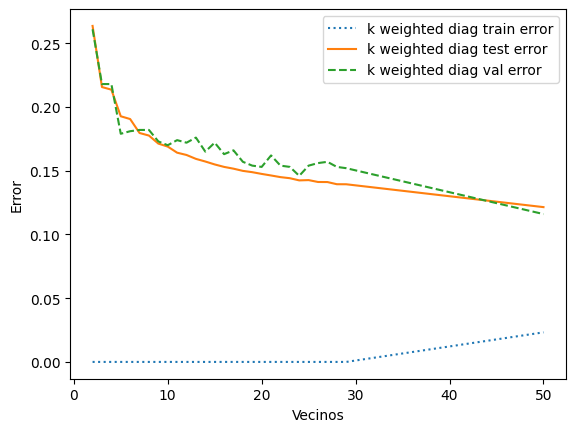

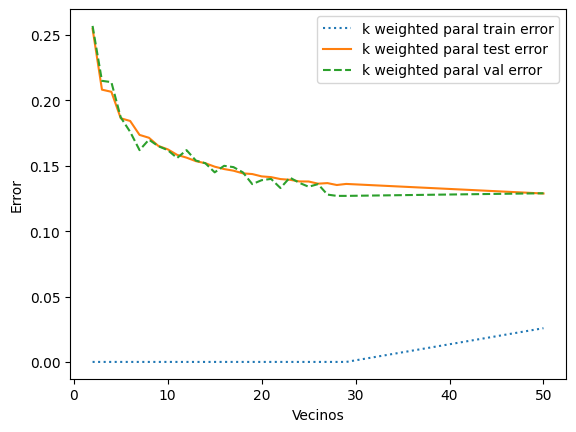

In [30]:
plt.plot(dataframes_d_32['Vecinos'],dataframes_d_32['TrainError'],label="k weighted diag train error",linestyle='dotted')
plt.plot(dataframes_d_32['Vecinos'],dataframes_d_32['TestError'],label="k weighted diag test error",linestyle='solid')
plt.plot(dataframes_d_32['Vecinos'],dataframes_d_32['ValError'],label="k weighted diag val error",linestyle='dashed')
plt.legend()
plt.xlabel("Vecinos")
plt.ylabel("Error")
plt.show()

plt.plot(dataframes_p_32['Vecinos'],dataframes_p_32['TrainError'],label="k weighted paral train error",linestyle='dotted')
plt.plot(dataframes_p_32['Vecinos'],dataframes_p_32['TestError'],label="k weighted paral test error",linestyle='solid')
plt.plot(dataframes_p_32['Vecinos'],dataframes_p_32['ValError'],label="k weighted paral val error",linestyle='dashed')
plt.legend()
plt.xlabel("Vecinos")
plt.ylabel("Error")
plt.show()

comentarios

# Ejercicio 4